In [1]:
from skimage import io, measure, img_as_ubyte
from skimage.filters import threshold_otsu, threshold_multiotsu
from skimage.color import label2rgb, rgb2gray
from skimage.segmentation import clear_border
import numpy as np
import matplotlib.pyplot as plt

(514, 652)


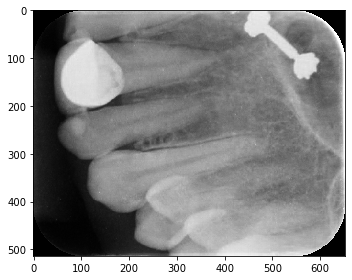

In [15]:
sample_img = io.imread('sample_data/images/2.jpg', as_gray=True)
print(np.shape(sample_img))
io.imshow(sample_img)

(array([10232.,  4096.,  2144.,  2900.,  2315.,  1215.,  2651.,  2753.,
         1415.,  2881.,  1350.,  2825.,  2605.,  1342.,  2731.,  2620.,
         1321.,  2207.,  1452.,   552.,   942.,   411.,   845.,   760.,
          437.,   808.,   748.,   335.,   618.,   552.,   219.,   384.,
          192.,   333.,   304.,   177.,   295.,   274.,   162.,   325.,
          362.,   211.,   448.,   253.,   487.,   502.,   274.,   683.,
          816.,   502.,  1115.,   600.,  1514.,  1709.,   897.,  2093.,
         2391.,  1306.,  2796.,  2938.,  1583.,  3208.,  1826.,  3846.,
         4315.,  2363.,  5217.,  5910.,  3113.,  6511.,  7006.,  3636.,
         7376.,  3703.,  7299.,  7355.,  3645.,  7334.,  7183.,  3608.,
         7092.,  6935.,  3335.,  6585.,  3147.,  6404.,  5924.,  2862.,
         5591.,  5105.,  2536.,  4761.,  4970.,  2446.,  4858.,  2357.,
         4762.,  4919.,  2294.,  4366.,  3893.,  1868.,  3519.,  1661.,
         3083.,  2995.,  1451.,  2773.,  2422.,  1148.,  2061., 

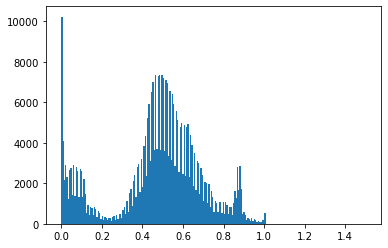

In [16]:
plt.hist(sample_img.flat, bins='auto', range=(0,1.5))

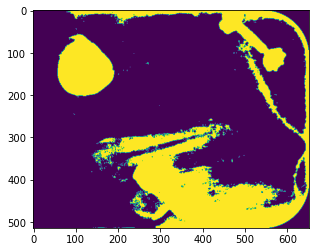

In [17]:
background = (sample_img <= 0.6)
img_data = (sample_img>0.6)
plt.imshow(img_data)

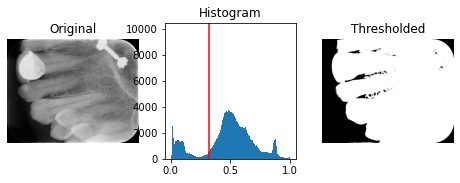

In [18]:
thresh = threshold_otsu(sample_img)
binary = sample_img > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(sample_img, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(sample_img.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

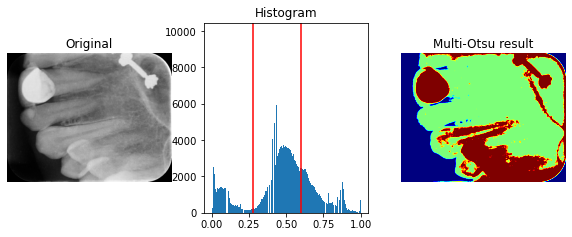

In [19]:
# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(sample_img)

# Using the threshold values, we generate the three regions.
regions = np.digitize(sample_img, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(sample_img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(sample_img.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

# Image segmentation followed by measurements

(514, 652)


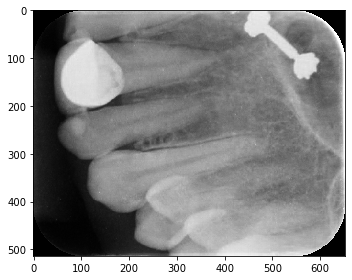

In [20]:
img_as_ubyte(sample_img)
print(np.shape(sample_img))
io.imshow(sample_img)

(array([10232.,  4096.,  2144.,  2900.,  2315.,  1215.,  2651.,  2753.,
         1415.,  2881.,  1350.,  2825.,  2605.,  1342.,  2731.,  2620.,
         1321.,  2207.,  1452.,   552.,   942.,   411.,   845.,   760.,
          437.,   808.,   748.,   335.,   618.,   552.,   219.,   384.,
          192.,   333.,   304.,   177.,   295.,   274.,   162.,   325.,
          362.,   211.,   448.,   253.,   487.,   502.,   274.,   683.,
          816.,   502.,  1115.,   600.,  1514.,  1709.,   897.,  2093.,
         2391.,  1306.,  2796.,  2938.,  1583.,  3208.,  1826.,  3846.,
         4315.,  2363.,  5217.,  5910.,  3113.,  6511.,  7006.,  3636.,
         7376.,  3703.,  7299.,  7355.,  3645.,  7334.,  7183.,  3608.,
         7092.,  6935.,  3335.,  6585.,  3147.,  6404.,  5924.,  2862.,
         5591.,  5105.,  2536.,  4761.,  4970.,  2446.,  4858.,  2357.,
         4762.,  4919.,  2294.,  4366.,  3893.,  1868.,  3519.,  1661.,
         3083.,  2995.,  1451.,  2773.,  2422.,  1148.,  2061., 

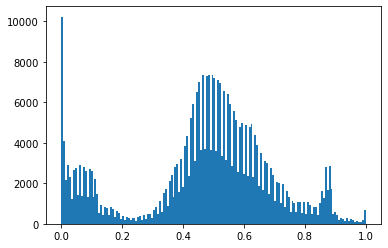

In [21]:
plt.hist(sample_img.ravel(), bins='auto')

0.322265625


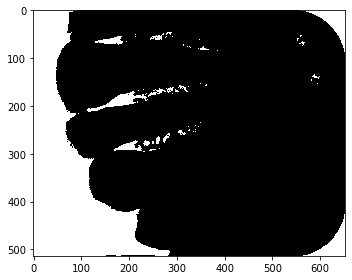

In [22]:
threshold = threshold_otsu(sample_img)
print(threshold)
threshold_img = sample_img<threshold
io.imshow(threshold_img)

[0.27539062 0.59960938]


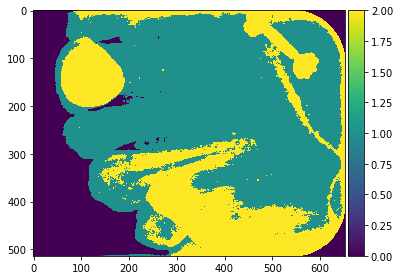

In [23]:
thresholds = threshold_multiotsu(sample_img, classes=3)
print(thresholds)
multi_threshold_img = np.digitize(sample_img, bins=thresholds)
io.imshow(multi_threshold_img)

In [24]:
# edge_touching_removed = clear_border(multi_threshold_img)
# io.imshow(edge_touching_removed)

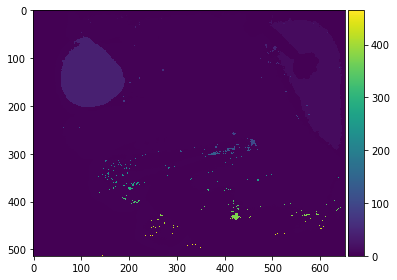

In [25]:
label_image = measure.label(multi_threshold_img, connectivity=sample_img.ndim)
io.imshow(label_image)

<ipython-input-26-dfcd7f176269>:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  image_label_overlay = label2rgb(label_image, image=sample_img)


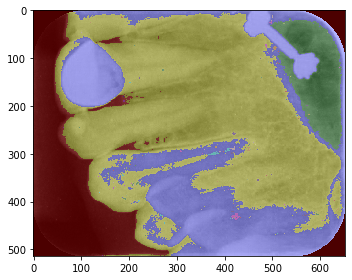

In [26]:
image_label_overlay = label2rgb(label_image, image=sample_img)
io.imshow(image_label_overlay)

In [31]:
properties = ['label', 'area', 'bbox', 'bbox_area', 'centroid']
props = measure.regionprops_table(label_image, sample_img, properties=properties)

In [32]:
props

{'label': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176,

In [33]:
import pandas as pd
df = pd.DataFrame(props)
df

label    area  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  centroid-0  \
0        1   76192       0      79     514     652     294522  325.977439   
1        2  160537       5      46     514     647     305909  224.480537   
2        3       1       6     443       7     444          1    6.000000   
3        4       1       9     396      10     397          1    9.000000   
4        5       1       9     408      10     409          1    9.000000   
..     ...     ...     ...     ...     ...     ...        ...         ...   
460    461       4     513     201     514     205          4  513.000000   
461    462       1     513     210     514     211          1  513.000000   
462    463       2     513     212     514     214          2  513.000000   
463    464       2     513     215     514     217          2  513.000000   
464    465      22     513     218     514     240         22  513.000000   

     centroid-1  
0    418.926593  
1    344.045479  
2    443.000000  
3    396.000000  
4    408.000000  
..          ...  
460  202.500000  
461  210.000000  
462  212.500000  
463  215.500000  
464  228.500000  

[465 rows x 9 columns]

In [34]:
df = df[df['area']>50]
df.head()

label    area  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  centroid-0  \
0        1   76192       0      79     514     652     294522  325.977439   
1        2  160537       5      46     514     647     305909  224.480537   
13      14   20609      17     496     292     645      40975  138.883983   
40      41   14039      55      58     206     193      20385  136.080348   
101    102     120     270     452     284     468        224  276.275000   

     centroid-1  
0    418.926593  
1    344.045479  
13   590.954292  
40   120.276231  
101  459.208333

In [37]:
df

label    area  bbox-0  bbox-1  bbox-2  bbox-3  bbox_area  centroid-0  \
0        1   76192       0      79     514     652     294522  325.977439   
1        2  160537       5      46     514     647     305909  224.480537   
13      14   20609      17     496     292     645      40975  138.883983   
40      41   14039      55      58     206     193      20385  136.080348   
101    102     120     270     452     284     468        224  276.275000   
136    137      89     294     366     305     388        242  299.831461   
372    373     139     424     414     439     432        270  430.928058   

     centroid-1  
0    418.926593  
1    344.045479  
13   590.954292  
40   120.276231  
101  459.208333  
136  376.764045  
372  423.172662

In [38]:
len(df.label)

7

### There are 7 most important lables and regions

In [65]:
props = measure.regionprops(label_image)

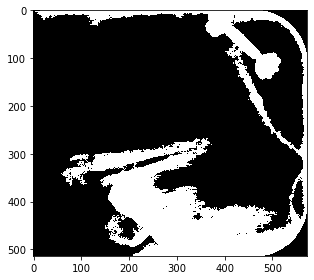

In [66]:
img = props[0].image
io.imshow(img)

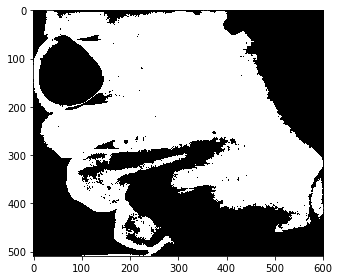

In [67]:
img = props[1].image
io.imshow(img)

In [79]:
props[1].intensity_image()

AttributeError: No intensity image specified.